<a href="https://colab.research.google.com/github/Kritika1303/TwitterSentimentAnalysis-with-real-time-analysis-/blob/main/TSAproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT DEPENDENCIES**

In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

**LOADING DATASET**

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Tweets.csv")

**EXPLORATORY DATA ANALYSIS**

In [6]:
#display first 5 records by default
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
#(rows,coulumns)
df.shape

(27481, 4)

In [8]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [10]:
#number of rows with null values
np.sum(df.isnull().any(axis=1))

1

In [11]:
#drop rows with atleast 1 null value
df=df.dropna()

In [12]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [13]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [14]:
df['sentiment'].nunique()

3

**DATA VISUALISATION**

<Axes: >

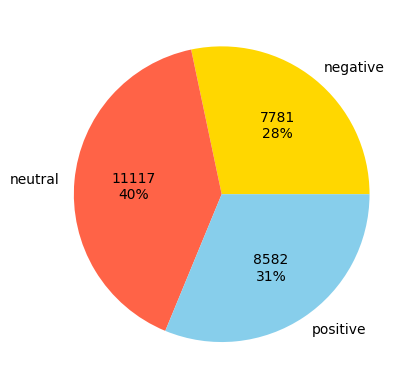

In [16]:
#checking dataset distribution
def pie_dist(value):
  return f'{value/100*len(df):.0f}\n{value:.0f}%'

df.groupby('sentiment').size().plot(kind='pie',colors=['gold','tomato','skyblue'],autopct=pie_dist,fontsize='10')

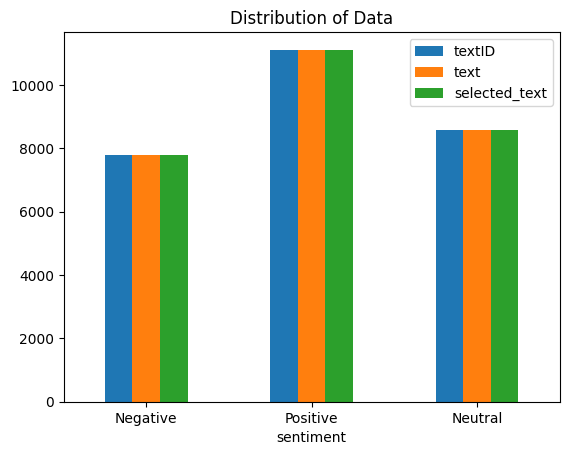

In [17]:
ax=df.groupby('sentiment').count().plot(kind='bar',title='Distribution of Data',legend=True)
ax.set_xticklabels(['Negative','Positive','Neutral'],rotation=0)
#storing data in lists
text,sentiment=list(df['text']),list(df['sentiment'])

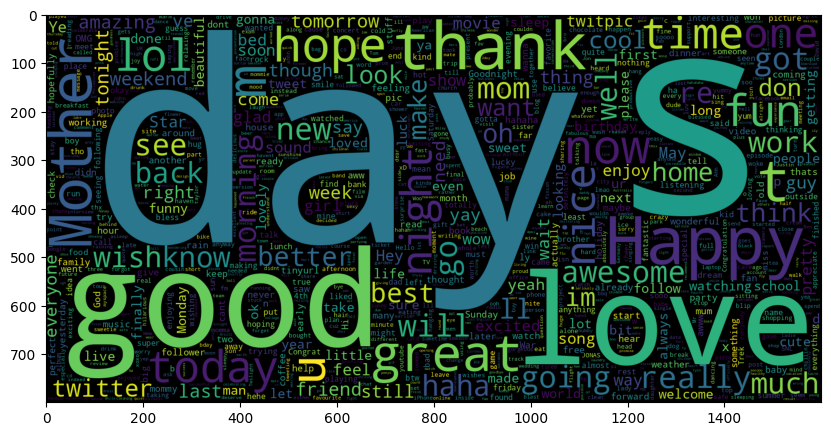

In [19]:
#wordcloud for positive sentiments
data_neg = df[df['sentiment'] == 'positive']
text_neg = ' '.join(data_neg['text'].astype(str))

plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(text_neg)
plt.imshow(wc)

**DATA PREPROCESSING**

In [26]:
dataFin=df[['text','sentiment']]

In [27]:
dataFin=dataFin.loc[:]

In [29]:
#convert to lowercase
dataFin['text']=dataFin['text'].str.lower()
dataFin['text'].head()

0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

In [30]:
#Removing stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS=set(stopwordlist)
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataFin['text'] = dataFin['text'].apply(lambda text: cleaning_stopwords(text))
dataFin['text'].head()


0                               i`d responded, going
1                         sooo sad miss san diego!!!
2                                boss bullying me...
3                             interview! leave alone
4    sons ****, couldn`t put releases already bought
Name: text, dtype: object

In [32]:
#Remove Punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataFin['text']= dataFin['text'].apply(lambda x: cleaning_punctuations(x))
dataFin['text'].head()


0                           id responded going
1                      sooo sad miss san diego
2                             boss bullying me
3                        interview leave alone
4    sons  couldnt put releases already bought
Name: text, dtype: object

In [33]:
#cleaning repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataFin['text'] = dataFin['text'].apply(lambda x: cleaning_repeating_char(x))
dataFin['text'].head()

0                           id responded going
1                      sooo sad miss san diego
2                             boss bullying me
3                        interview leave alone
4    sons  couldnt put releases already bought
Name: text, dtype: object

In [34]:
#cleaning urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataFin['text'] = dataFin['text'].apply(lambda x: cleaning_URLs(x))
dataFin['text'].tail()

27476    wish could come see u denver husband lost job ...
27477    ive wondered rake to client made clear net onl...
27478    yay good you enjoy break  probably need hectic...
27479                                           but worth 
27480                  flirting going  atg smiles yay hugs
Name: text, dtype: object

In [35]:
#cleaning numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataFin['text'] = dataFin['text'].apply(lambda x: cleaning_numbers(x))
dataFin['text'].tail()

27476    wish could come see u denver husband lost job ...
27477    ive wondered rake to client made clear net onl...
27478    yay good you enjoy break  probably need hectic...
27479                                           but worth 
27480                  flirting going  atg smiles yay hugs
Name: text, dtype: object

In [36]:
dataFin['text'].dtype

dtype('O')

In [37]:
from nltk.tokenize import RegexpTokenizer
# Convert 'text' column to string
dataFin['text'] = dataFin['text'].astype(str)

# Tokenize 'text' column using RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataFin['text'] = dataFin['text'].apply(lambda x: tokenizer.tokenize(x))

# Display the tokenized 'text' column
print(dataFin['text'].head())

0                             [id, responded, going]
1                      [sooo, sad, miss, san, diego]
2                               [boss, bullying, me]
3                          [interview, leave, alone]
4    [sons, couldnt, put, releases, already, bought]
Name: text, dtype: object


**SPLITTING OF DATASET**

In [48]:
X=df.text
Y=df.sentiment

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state =26105111)

**TRANSFORMING DATASET USING TFIDF VECTORIZER**

In [50]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

# Get the number of feature words
print('No. of feature_words:', len(vectorizer.get_feature_names_out()))

No. of feature_words: 150742


In [51]:
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

**MODEL EVALUATION**

In [52]:
# function
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(Y_test, y_pred))
    cf_matrix = confusion_matrix(Y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

**Bernoulli Naive Bayes Classifier**

              precision    recall  f1-score   support

    negative       0.83      0.11      0.20      1568
     neutral       0.46      0.96      0.62      2236
    positive       0.88      0.31      0.46      1692

    accuracy                           0.52      5496
   macro avg       0.72      0.46      0.43      5496
weighted avg       0.70      0.52      0.45      5496



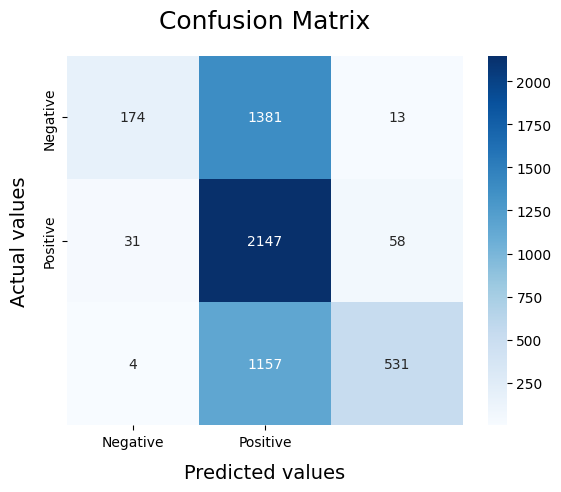

In [53]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [54]:
y_pred1[1]

'neutral'

**Support Vector Machine(SVM)**

              precision    recall  f1-score   support

    negative       0.67      0.66      0.67      1568
     neutral       0.66      0.65      0.66      2236
    positive       0.75      0.78      0.76      1692

    accuracy                           0.69      5496
   macro avg       0.69      0.70      0.70      5496
weighted avg       0.69      0.69      0.69      5496



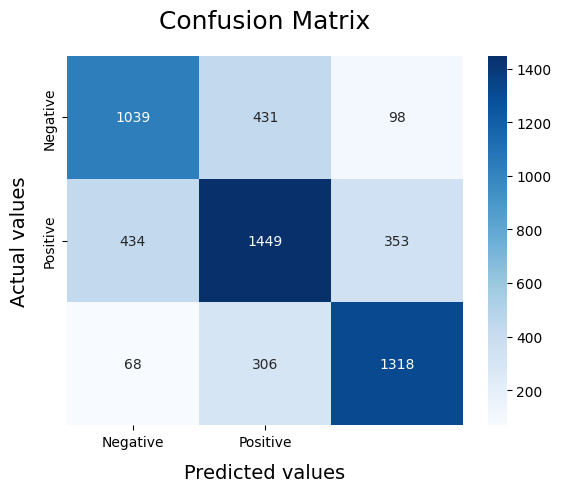

In [55]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

**LOGISTIC REGRESSION**

              precision    recall  f1-score   support

    negative       0.70      0.64      0.67      1568
     neutral       0.66      0.71      0.68      2236
    positive       0.77      0.76      0.76      1692

    accuracy                           0.70      5496
   macro avg       0.71      0.70      0.71      5496
weighted avg       0.71      0.70      0.70      5496



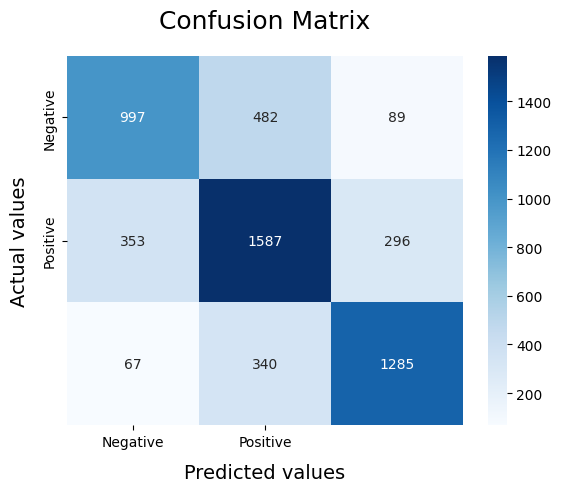

In [56]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

**RESULT : LOGISTIC REGRESSION SHOWS MAXIMUM ACCURACY**

**REAL-TIME ANALYSIS**

In [57]:
import tweepy
from tweepy import OAuthHandler

In [58]:
consumer_key='pK8ddPWMsg4FvUmlpwx9ODW9J'
consumer_secret='q2a4aLz9ttkqMwjPN0PV9nATqMFGzA1ndqA7UGWklOsrxYb6Pz'
access_token = '1588794867202736128-JYiLpJMErUzbCG302Bx4RhKor25wCi'
access_token_secret='CoZYQJrFLdOb21Hy1kp5qHTuze53WdM4LzaaCvMDpaL0P'

In [59]:
try:
  auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
  auth.set_access_token(access_token,access_token_secret)
  api=tweepy.API(auth)
except:
  print("Error: Authentication Failed")

In [65]:
amazon=api.user_timeline(screen_name="amazon",count=100,lang='eng',tweet_mode='extended')
print("Show the latest 5 tweets:\n")
i=1
for tweet in amazon[0:5]:
  print(str(i)+': '+tweet.full_text+'\n')
  i=i+1

Show the latest 5 tweets:

1: RT @amazonnews: #PrimeDay is coming in hot 🔥, and so are all the early, exclusive deals. Starting now, Prime members have access to deals o…

2: @Katrina19890628 We're sorry for the poor experience! We'd like to look into this in a bit more detail. At your earliest convenience, please reach us here: https://t.co/YyJL5t4r2h. -Braden

3: @msconjenniality 🧡🧡🧡

4: @jazz_exquisite 😮 Magic! ⚡🎩📦🧡

5: @kabochakiti We'd like to help you with this, please reach out to us via DM. We'll do our best to assist. Further, please don’t share any personal information. -Brandon https://t.co/8Lpni2HjRh



In [66]:
df=pd.DataFrame([tweet.full_text for tweet in amazon],columns=['Tweets'])
df.head()

,Tweets
0,"RT @amazonnews: #PrimeDay is coming in hot 🔥, ..."
1,@Katrina19890628 We're sorry for the poor expe...
2,@msconjenniality 🧡🧡🧡
3,@jazz_exquisite 😮 Magic! ⚡🎩📦🧡
4,"@kabochakiti We'd like to help you with this, ..."


In [70]:
real_time_prediction=LRmodel.predict(vectorizer.transform(df['Tweets']))

In [74]:
real_time_prediction[1]

'negative'